In [0]:
import numpy as np
import torch


In [0]:
# importing the optim module
from torch import optim

# adam
## adam = optim.Adam(model.parameters(), lr=learning_rate)

# sgd
## SGD = optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
# importing the libraries
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch
from torchvision import datasets, transforms
import helper
import torch.nn as nn
import torch.nn.functional as F
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data


In [0]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


In [89]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
class model(nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) 
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)    
  def forward(self, t):
        # implement the forward pass
        t=self.conv1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=F.relu(t)
        t=self.fc2(t)
        t=F.relu(t)
        t=self.out(t)
        return t
# Define the network architecture(model) using a class.
# Use conv2d layers, activation function after each such layer, use Batchnorm and Maxpooling. Play with these parameters,
# layers and things like kernel size, stride etc and see how it affects your results.
# Finally use a linear layer in the end
# Define the forward pass

In [100]:
model=model()
sample=next(iter(trainset))
image,lable=sample
image.shape

torch.Size([1, 28, 28])

In [103]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
n_epochs = 30
model.train()
for epoch in range(n_epochs):
    train_loss = 0.0
    for data, target in trainloader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    train_loss = train_loss/len(trainloader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.300741
Epoch: 2 	Training Loss: 0.295892
Epoch: 3 	Training Loss: 0.291968
Epoch: 4 	Training Loss: 0.287257
Epoch: 5 	Training Loss: 0.283040
Epoch: 6 	Training Loss: 0.279977
Epoch: 7 	Training Loss: 0.277050
Epoch: 8 	Training Loss: 0.272996
Epoch: 9 	Training Loss: 0.269282
Epoch: 10 	Training Loss: 0.265890
Epoch: 11 	Training Loss: 0.262145
Epoch: 12 	Training Loss: 0.259632
Epoch: 13 	Training Loss: 0.257279
Epoch: 14 	Training Loss: 0.253854
Epoch: 15 	Training Loss: 0.250902
Epoch: 16 	Training Loss: 0.248411
Epoch: 17 	Training Loss: 0.245885
Epoch: 18 	Training Loss: 0.243644
Epoch: 19 	Training Loss: 0.240265
Epoch: 20 	Training Loss: 0.238521
Epoch: 21 	Training Loss: 0.236491
Epoch: 22 	Training Loss: 0.234259
Epoch: 23 	Training Loss: 0.231085
Epoch: 24 	Training Loss: 0.229624
Epoch: 25 	Training Loss: 0.226968
Epoch: 26 	Training Loss: 0.224369
Epoch: 27 	Training Loss: 0.222418
Epoch: 28 	Training Loss: 0.221663
Epoch: 29 	Training Loss: 0.2

In [110]:
test_losses = []
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in testloader:
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item()*data.size(0)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(testloader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testloader.dataset),
    100. * correct / len(testloader.dataset)))
test()



Test set: Avg. loss: 0.3130, Accuracy: 8882/10000 (89%)



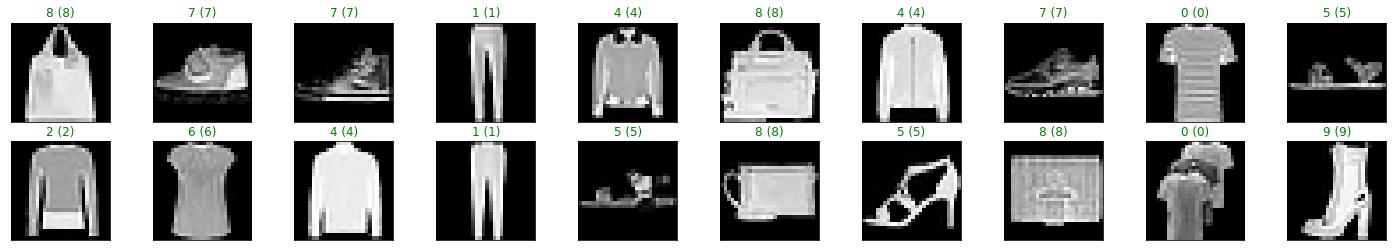

In [113]:
dataiter = iter(testloader)
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))